In [6]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

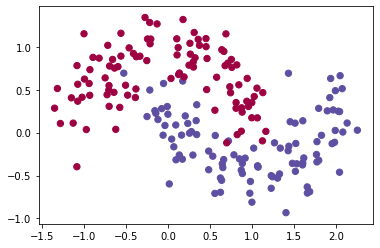

In [7]:

# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [19]:
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

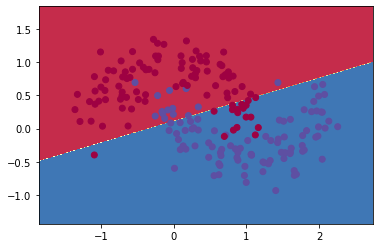

In [20]:
clf = sklearn.linear_model.LogisticRegression()
clf.fit(X, y)


plot_decision_boundary(lambda x: clf.predict(x), X, y)


<img src='images/_1.JPG'>

In [22]:

num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
 
# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [65]:
nn_hdim = 5

In [66]:
# Initialize the parameters to random values. We need to learn these. 
np.random.seed(0) 
W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim) 
b1 = np.zeros((1, nn_hdim)) 
W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim) 
b2 = np.zeros((1, nn_output_dim)) 

In [67]:
W1.shape, b1.shape, W2.shape, b2.shape

((2, 5), (1, 5), (5, 2), (1, 2))

In [68]:
# This is what we return at the end 
model = {} 

In [69]:
X_ori = X.copy()
y_ori = y.copy()

### USING X_SAMPLE DATA 

In [70]:
X = X[0:4]
y = y[0:4]

In [93]:
num_examples = len(X)

<img src='images/_2_.JPG'>

In [78]:
# Forward propagation 
z1 = np.dot(X, W1) + b1 
a1 = np.tanh(z1) 
z2 = np.dot(a1, W2) + b2 
exp_scores = np.exp(z2) 
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 

In [87]:
X.shape, y.shape, W1.shape, b1.shape, W2.shape, b2.shape

((4, 2), (4,), (2, 5), (1, 5), (5, 2), (1, 2))

In [73]:
X, y

(array([[ 0.74346118,  0.46465633],
        [ 1.65755662, -0.63203157],
        [-0.15878875,  0.25584465],
        [-1.088752  , -0.39694315]]), array([0, 1, 1, 0], dtype=int64))

In [88]:
z1 = np.dot(X, W1) + b1 
z1

array([[ 0.60627765,  0.52252783,  0.46479869,  1.14413823,  1.11669418],
       [ 2.50435097,  0.04440444,  1.21479259,  2.67261256,  2.00540567],
       [-0.37486769,  0.12695011, -0.13727524, -0.2702821 , -0.13540937],
       [-1.08377673, -0.57473855, -0.71101194, -1.69621123, -1.5530128 ]])

In [89]:
a1 = np.tanh(z1)
a1

array([[ 0.54150154,  0.47964864,  0.43398719,  0.81580287,  0.80641597],
       [ 0.9867295 ,  0.04437527,  0.83811136,  0.99050355,  0.96440751],
       [-0.35824208,  0.12627249, -0.1364194 , -0.26388731, -0.13458779],
       [-0.79459545, -0.51883079, -0.611311  , -0.93493376, -0.91428122]])

In [90]:
z2 = np.dot(a1, W2) + b2
z2

array([[ 0.94227827,  0.06016715],
       [ 1.04188496,  0.30997441],
       [-0.20234604, -0.17085701],
       [-1.10181871, -0.2012343 ]])

In [91]:
exp_scores = np.exp(z2) 
exp_scores

array([[2.56582041, 1.06201405],
       [2.834555  , 1.36339022],
       [0.81681223, 0.8429421 ],
       [0.33226624, 0.81772082]])

<img src='images/_3.JPG'>

In [92]:
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
probs

array([[0.70725951, 0.29274049],
       [0.67522439, 0.32477561],
       [0.49212839, 0.50787161],
       [0.28893042, 0.71106958]])

<img src='images/_4.JPG'>

In [102]:
# Backpropagation 
delta3 = probs 
delta3[range(num_examples), y] -= 1 
dW2 = (a1.T).dot(delta3) 
db2 = np.sum(delta3, axis=0, keepdims=True) 
delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2)) 
dW1 = np.dot(X.T, delta2) 
db1 = np.sum(delta2, axis=0)

In [94]:
delta3 = probs 
delta3

array([[0.70725951, 0.29274049],
       [0.67522439, 0.32477561],
       [0.49212839, 0.50787161],
       [0.28893042, 0.71106958]])

In [95]:
delta3[range(num_examples), y] -= 1
delta3

array([[-0.29274049,  0.29274049],
       [ 0.67522439, -0.67522439],
       [ 0.49212839, -0.49212839],
       [-0.71106958,  0.71106958]])

In [97]:
dW2 = (a1.T).dot(delta3) 
dW2

array([[ 0.89645596, -0.89645596],
       [ 0.32061776, -0.32061776],
       [ 0.80641641, -0.80641641],
       [ 0.96493014, -0.96493014],
       [ 0.99900396, -0.99900396]])

In [98]:
db2 = np.sum(delta3, axis=0, keepdims=True)
db2

array([[ 0.16354271, -0.16354271]])

In [99]:
delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
delta2

array([[ 0.12123476, -0.06444666, -0.01170866, -0.07440522, -0.05343389],
       [-0.01043125,  0.19268787,  0.00990123,  0.00969932,  0.0246425 ],
       [-0.25135606,  0.13847144,  0.02379977,  0.3479366 ,  0.25222389],
       [ 0.15358586, -0.14858728, -0.02194556, -0.06803039, -0.06090325]])

In [100]:
dW1 = np.dot(X.T, delta2) 
dW1

array([[-0.05446145,  0.41126446,  0.02782105, -0.02042041,  0.02737854],
       [-0.06234758, -0.05732249,  0.00310179,  0.07531878,  0.04830203]])

In [101]:
db1 = np.sum(delta2, axis=0)
db1

array([1.30333098e-02, 1.18125378e-01, 4.67872021e-05, 2.15200311e-01,
       1.62529251e-01])

In [105]:
# Add regularization terms (b1 and b2 don't have regularization terms) 
dW2 += reg_lambda * W2 
dW1 += reg_lambda * W1 

# Gradient descent parameter update 
W1 += -epsilon * dW1 
b1 += -epsilon * db1 
W2 += -epsilon * dW2 
b2 += -epsilon * db2 

In [106]:
# Assign new parameters to the model 
model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

### USING ALL DATA 

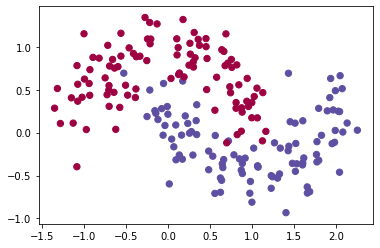

In [111]:

# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [112]:
X.shape, y.shape

((200, 2), (200,))

In [113]:
num_examples = len(X)

In [114]:
# Helper function to evaluate the total loss on the dataset 
def calculate_loss(model): 
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2'] 
    # Forward propagation to calculate our predictions 
    z1 = X.dot(W1) + b1 
    a1 = np.tanh(z1) 
    z2 = a1.dot(W2) + b2 
    exp_scores = np.exp(z2) 
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
    # Calculating the loss 
    corect_logprobs = -np.log(probs[range(num_examples), y]) 
    data_loss = np.sum(corect_logprobs) 
    # Add regulatization term to loss (optional) 
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2))) 
    return 1./num_examples * data_loss 

In [115]:
# Helper function to predict an output (0 or 1) 
def predict(model, x): 
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2'] 
    # Forward propagation 
    z1 = x.dot(W1) + b1 
    a1 = np.tanh(z1) 
    z2 = a1.dot(W2) + b2 
    exp_scores = np.exp(z2) 
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
    return np.argmax(probs, axis=1) 

In [117]:
# This function learns parameters for the neural network and returns the model. 
# - nn_hdim: Number of nodes in the hidden layer 
# - num_passes: Number of passes through the training data for gradient descent 
# - print_loss: If True, print the loss every 1000 iterations 
def build_model(nn_hdim, num_passes=20000, print_loss=False): 
 
    # Initialize the parameters to random values. We need to learn these. 
    np.random.seed(0) 
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim) 
    b1 = np.zeros((1, nn_hdim)) 
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim) 
    b2 = np.zeros((1, nn_output_dim)) 
 
    # This is what we return at the end 
    model = {} 
 
    # Gradient descent. For each batch... 
    for i in range(0, num_passes): 
 
        # Forward propagation 
        z1 = X.dot(W1) + b1 
        a1 = np.tanh(z1) 
        z2 = a1.dot(W2) + b2 
        exp_scores = np.exp(z2) 
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
 
        # Backpropagation 
        delta3 = probs 
        delta3[range(num_examples), y] -= 1 
        dW2 = (a1.T).dot(delta3) 
        db2 = np.sum(delta3, axis=0, keepdims=True) 
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2)) 
        dW1 = np.dot(X.T, delta2) 
        db1 = np.sum(delta2, axis=0) 
 
        # Add regularization terms (b1 and b2 don't have regularization terms) 
        dW2 += reg_lambda * W2 
        dW1 += reg_lambda * W1 
 
        # Gradient descent parameter update 
        W1 += -epsilon * dW1 
        b1 += -epsilon * db1 
        W2 += -epsilon * dW2 
        b2 += -epsilon * db2 
 
        # Assign new parameters to the model 
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2} 
 
        # Optionally print the loss. 
        # This is expensive because it uses the whole dataset, so we don't want to do it too often. 
        if print_loss and i % 1000 == 0: 
            print("Loss after iteration %i: %f" %(i, calculate_loss(model))) 
 
    return model 

In [118]:
# Build a model with a 3-dimensional hidden layer 
model = build_model(3, print_loss=True) 

Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.068890
Loss after iteration 3000: 0.071218
Loss after iteration 4000: 0.071253
Loss after iteration 5000: 0.071278
Loss after iteration 6000: 0.071293
Loss after iteration 7000: 0.071303
Loss after iteration 8000: 0.071308
Loss after iteration 9000: 0.071312
Loss after iteration 10000: 0.071314
Loss after iteration 11000: 0.071315
Loss after iteration 12000: 0.071315
Loss after iteration 13000: 0.071316
Loss after iteration 14000: 0.071316
Loss after iteration 15000: 0.071316
Loss after iteration 16000: 0.071316
Loss after iteration 17000: 0.071316
Loss after iteration 18000: 0.071316
Loss after iteration 19000: 0.071316


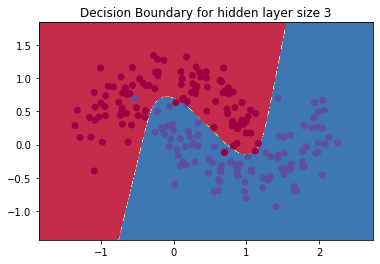

In [121]:
# Plot the decision boundary
plt.title("Decision Boundary for hidden layer size 3") 
plot_decision_boundary(lambda x: predict(model, x), X, y) 


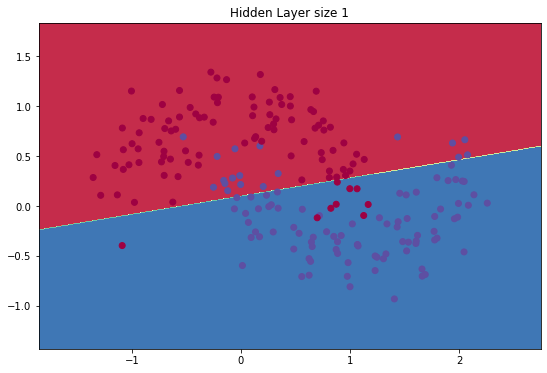

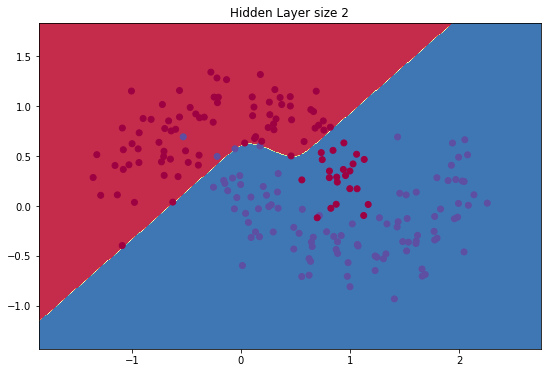

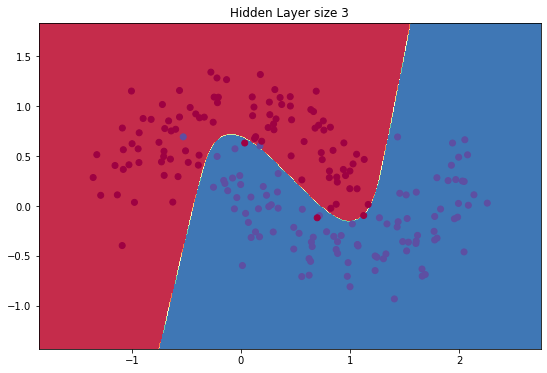

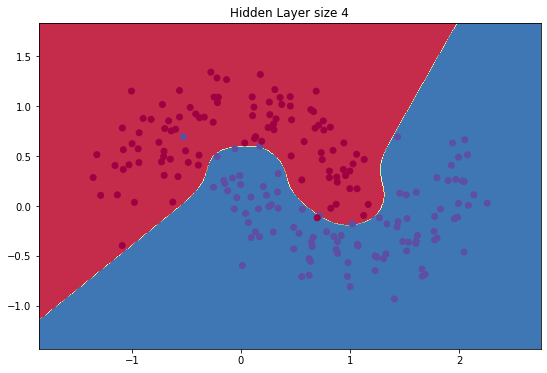

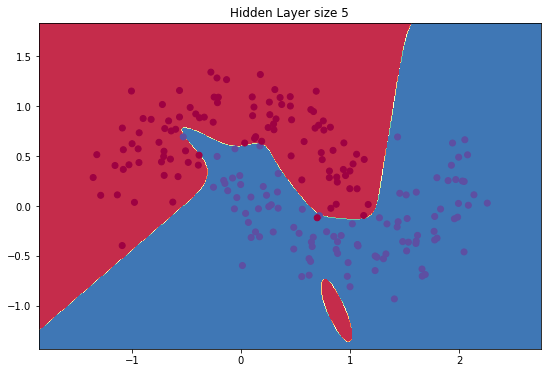

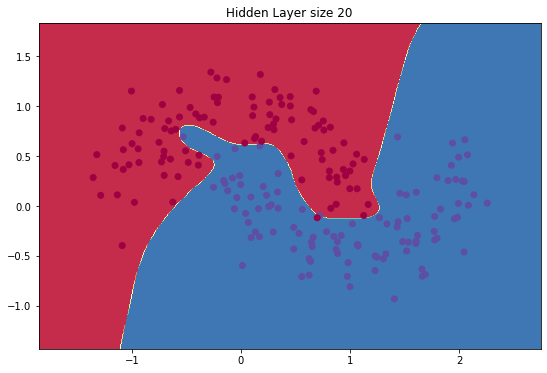

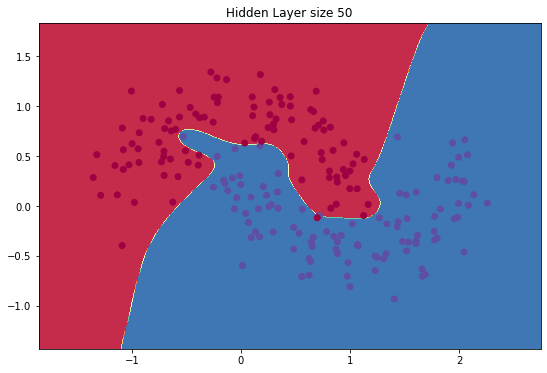

In [127]:
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50] 
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.figure(figsize=(9, 6)) 
    #plt.subplot(5, 2, i+1) 
    plt.title('Hidden Layer size %d' % nn_hdim) 
    model = build_model(nn_hdim) 
    plot_decision_boundary(lambda x: predict(model, x), X, y) 
    plt.show()

ref: https://cs231n.github.io/optimization-2/

http://colah.github.io/posts/2015-08-Backprop/

http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/